In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import os
import cv2
import tensorflow as tf
import matplotlib.image as mpimg
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from skimage.transform import resize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from skimage.color import rgb2gray
from tqdm.notebook import tqdm
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras import layers, models
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Conv2D, Conv1D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
gpus = tf.config.experimental.list_physical_devices('GPU') #with import tensorflow
tf.config.experimental.set_memory_growth(gpus[0], True) # me too

RuntimeError: Physical devices cannot be modified after being initialized

In [2]:
# path = "./data/"
# labels = []
# file_id = []
# full_names = []
# lables = os.listdir(path)
# for label in lables:
#     data_names = os.listdir(path+ "/" +label)
#     for name in data_names:
#         labels.append(label)
#         file_id.append(name)
#         full_names.append(label + "/" + name)

# full_names

In [3]:
xyz_df = pd.read_csv("./merge_sp.csv")
xyz_df.head(40)


,x,y,z,label
0,0.000000,0.000000,0.000000,29
1,0.025550,0.067353,-0.063020,29
2,0.016752,0.137709,-0.097287,29
3,-0.012997,0.195587,-0.108628,29
4,-0.048682,0.228576,-0.118143,29
5,-0.043438,0.087914,-0.165980,29
6,-0.099320,0.147953,-0.195402,29
7,-0.136327,0.177091,-0.192493,29
8,-0.164715,0.195230,-0.184031,29
9,-0.076180,0.074541,-0.126534,29


In [4]:
labels = xyz_df["label"]
xyz_df = xyz_df.drop("label", axis=1)

In [5]:
xyz_df.shape

(158844, 3)

In [6]:
arr = np.array([xyz_df.iloc[i:i+21, :].to_numpy() for i in range(0, len(xyz_df), 21)])
arr.shape

(7564, 21, 3)

In [7]:
new_labels = []
for i in range(0, len(labels), 21):
    new_labels.append(labels[i])
    # print(i)
print(len(new_labels))

7564


In [8]:
# new_labels

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(new_labels)
labels_encoded = encoder.transform(new_labels)
labels_encoded[:3], encoder.classes_

(array([22, 22, 22]),
 array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
        '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28',
        '29', '3', '30', '4', '5', '6', '7', '8', '9', 'backspace',
        'question', 'shift', 'space'], dtype='<U9'))

In [10]:
############# 라벨이 각 x,y,z 값마다 달려있어서 개수가 안맞음 수정필요
X_train, X_test, y_train, y_test = train_test_split(arr, labels_encoded, test_size=0.2,
                                                    random_state=13, stratify=labels_encoded)
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
X_train.shape, X_test.shape

((6051, 21, 3), (1513, 21, 3))

In [11]:
# model = Sequential()

# # model.add(Conv1D(filters=8, kernel_size=3, input_shape=(21, 3)))
# # model.add(Activation("relu"))

# # model.add(Conv1D(10, 3))
# # model.add(Activation("relu"))

# # model.add(Conv1D(10, 3))
# # model.add(Activation("relu"))

# model.add(Flatten(input_shape=(21, 3)))

# model.add(Dense(10))
# model.add(Activation("relu"))

# model.add(Dense(35))  # 출력 레이어, 클래스의 개수에 맞게 노드 개수 조정
# model.add(Activation("softmax"))  # 다중 클래스 분류를 위해 softmax 사용

# model.summary()

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(21, 3)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(35, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 63)                0         
                                                                 
 dense (Dense)               (None, 64)                4096      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 35)                1155      
                                                                 
Total params: 7331 (28.64 KB)
Trainable params: 7331 (28.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-03-27 13:34:59.105264: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-27 13:34:59.105763: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-27 13:34:59.105921: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [12]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adam(learning_rate=0.0002),
              metrics=["accuracy"])

In [13]:
batch_size = 32
his = model.fit(
    X_train, y_train_encoded,
    epochs=150,
    batch_size=batch_size,
    validation_data=(X_test, y_test_encoded),
    validation_steps=len(X_test) // batch_size
)

Epoch 1/150


2024-03-27 13:35:02.042608: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x606f729be6c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-27 13:35:02.042666: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-03-27 13:35:02.049725: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-27 13:35:02.242472: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-03-27 13:35:02.324718: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


190/190 [==============================] - 4s 6ms/step - loss: 3.4908 - accuracy: 0.0721 - val_loss: 3.4038 - val_accuracy: 0.0904
Epoch 2/150
190/190 [==============================] - 1s 4ms/step - loss: 3.2415 - accuracy: 0.1446 - val_loss: 3.0306 - val_accuracy: 0.2108
Epoch 3/150
190/190 [==============================] - 1s 3ms/step - loss: 2.7860 - accuracy: 0.2329 - val_loss: 2.5422 - val_accuracy: 0.2261
Epoch 4/150
190/190 [==============================] - 1s 4ms/step - loss: 2.3440 - accuracy: 0.2902 - val_loss: 2.1790 - val_accuracy: 0.3883
Epoch 5/150
190/190 [==============================] - 1s 4ms/step - loss: 2.0611 - accuracy: 0.4297 - val_loss: 1.9557 - val_accuracy: 0.4382
Epoch 6/150
190/190 [==============================] - 1s 4ms/step - loss: 1.8767 - accuracy: 0.4669 - val_loss: 1.7988 - val_accuracy: 0.4568
Epoch 7/150
190/190 [==============================] - 1s 5ms/step - loss: 1.7372 - accuracy: 0.4880 - val_loss: 1.6718 - val_accuracy: 0.5160
Epoch 8/150

In [14]:
model.save("handModel_mini.h5")

/home/rds/venv/opencv_venv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


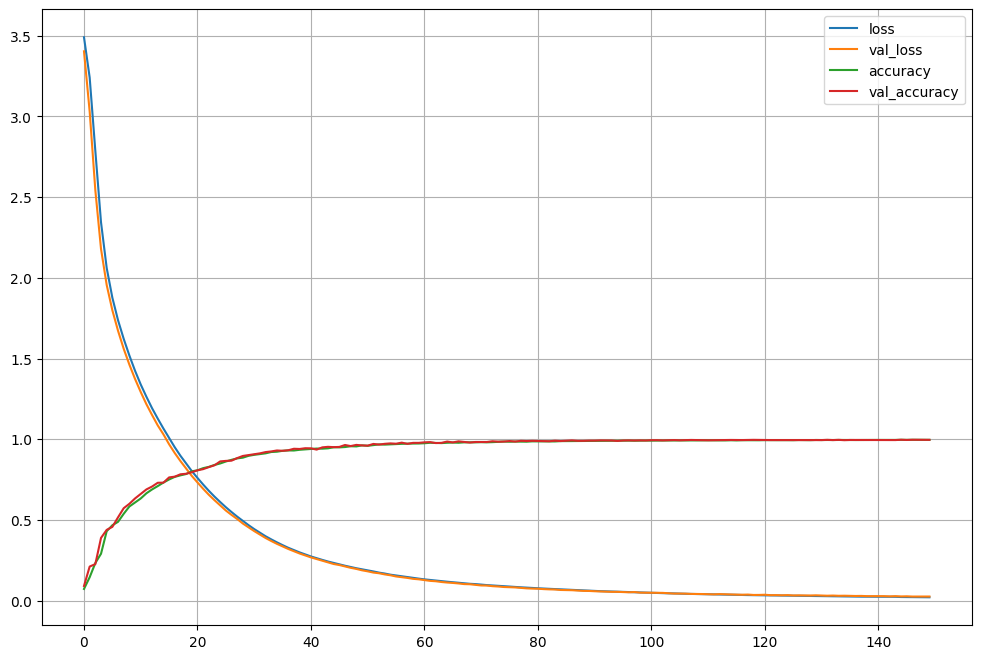

In [15]:

plot_target = ["loss", "val_loss", "accuracy", "val_accuracy"]

plt.figure(figsize=(12,8))
for each in plot_target:
    plt.plot(his.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

2024-04-04 10:03:05.188788: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-04 10:03:05.188992: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-04 10:03:05.189082: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [15]:
import mediapipe as mp
from tensorflow.keras.models import load_model
model = load_model("/home/rds/Desktop/git_ws/deeplearning-repo-5/src/ljh/deep/handModel.h5")
hand_data_dict = {
            0 : "ㄱ", 1 : "ㄴ", 2 : "ㅋ", 3 : "ㅌ", 4 : "ㅍ", 
            5 : "ㅎ", 6 : "ㅏ", 7 : "ㅑ", 8 : "ㅓ", 9 : "ㅕ",
            10 : "ㅗ", 11 : "ㅛ", 12 : "ㄷ", 13 : "ㅜ", 14 : "ㅠ",
            15 : "ㅡ", 16 : "ㅣ", 17 : "ㅐ", 18 : "ㅔ", 19 : "ㅚ",
            20 : "ㅟ", 21 : "ㅒ", 22 : "ㅖ", 23 : "ㄹ", 24 : "ㅢ",
            25 : "ㅁ", 26 : "ㅂ", 27 : "ㅅ", 28 : "ㅇ", 29 : "ㅈ",
            30 : "ㅊ", 31 : "backspace", 32 : "question", 33 : "shift", 34 : "space"}

img_path = "/home/rds/Pictures/Screenshots/Screenshot from 2024-04-04 10-14-29.png"
img = cv2.imread(img_path)
org = img
mp_hands = mp.solutions.hands
with mp_hands.Hands(
            model_complexity=0,
            min_detection_confidence=0.7,
            min_tracking_confidence=0.7) as hands :
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = hands.process(img)
    landmarks = results.multi_hand_landmarks[0]
    xyz_list = []
    for landmark in landmarks.landmark :
            row = [landmark.x - landmarks.landmark[0].x, landmark.y - landmarks.landmark[0].y, landmark.z - landmarks.landmark[0].z]
            xyz_list.append(row)
    arr = np.array(xyz_list)
    arr = arr.reshape(1, 21, 3)
    yhat = model.predict(arr, verbose=0)[0]
    result = hand_data_dict[np.argmax(yhat)]
print(result)



ㄱ


I0000 00:00:1712193525.173321    9597 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1712193525.175740   11175 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
